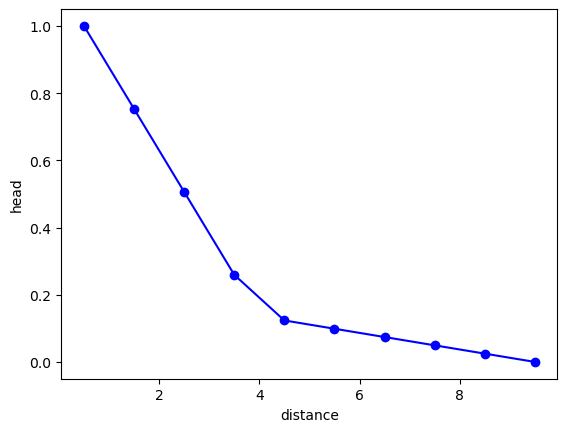

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import flopy
ws = './mymodel'
name = 'mymodel'
sim = flopy.mf6.MFSimulation(sim_name=name, sim_ws=ws, exe_name='mf6', verbosity_level=0)
tdis = flopy.mf6.ModflowTdis(sim)
ims = flopy.mf6.ModflowIms(sim)
gwf = flopy.mf6.ModflowGwf(sim, modelname=name, save_flows=True)
dis = flopy.mf6.ModflowGwfdis(gwf, nrow=1, ncol=10)
ic = flopy.mf6.ModflowGwfic(gwf)
k = np.ones((1, 1, 10), dtype=float)
k[:, :, 4:] = 10.
npf = flopy.mf6.ModflowGwfnpf(gwf, k=k)
chd = flopy.mf6.ModflowGwfchd(gwf, stress_period_data=[[(0, 0, 0), 1.],
                                                       [(0, 0, 9), 0.]])
budget_file = name + '.bud'
head_file = name + '.hds'
oc = flopy.mf6.ModflowGwfoc(gwf,
                            budget_filerecord=budget_file,
                            head_filerecord=head_file,
                            saverecord=[('HEAD', 'ALL'), ('BUDGET', 'ALL')])
sim.write_simulation()
sim.run_simulation(silent=True)

head = gwf.output.head().get_data().flatten()
x = np.linspace(0.5, 9.5, 10)
plt.plot(x, head, "bo-")
plt.xlabel("distance")
plt.ylabel("head");

